# Exploratory Data Analysis (EDA) and Feature Engineering

In this notebook, we perform exploratory data analysis on Falcon 9 launch data to identify key patterns and relationships that may impact the success of first stage landings. We also conduct initial feature engineering to prepare the dataset for modeling.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Data Loading

We begin by loading the cleaned dataset from the previous step.


In [4]:
df = pd.read_csv("../data/processed/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## Data Overview

Review the structure and completeness of the dataset to validate the inputs before visual analysis.

In [5]:
df.info()
df.isnull().sum() / len(df) * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
Class              0.000000
dtype: float64

## Payload vs Flight Number

Examine whether the payload mass has any influence on the success of the landing, across different flights.

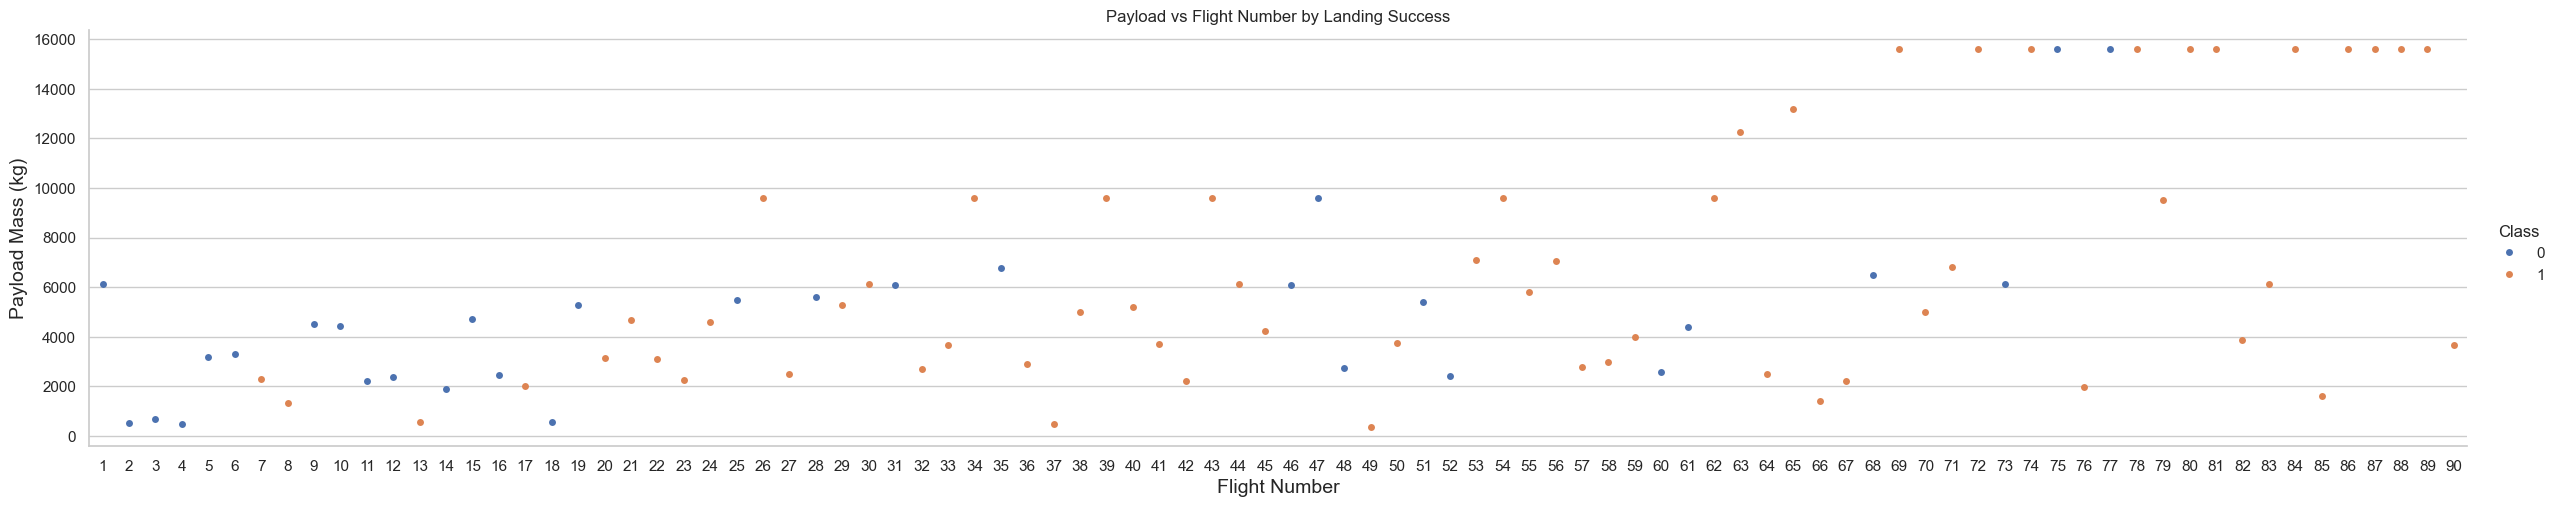

In [6]:
sns.catplot(data=df, x="FlightNumber", y="PayloadMass", hue="Class", aspect=5)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Payload Mass (kg)", fontsize=14)
plt.title("Payload vs Flight Number by Landing Success")
plt.show()

## Launch Site Analysis

Explore how landing success varies across different launch sites.

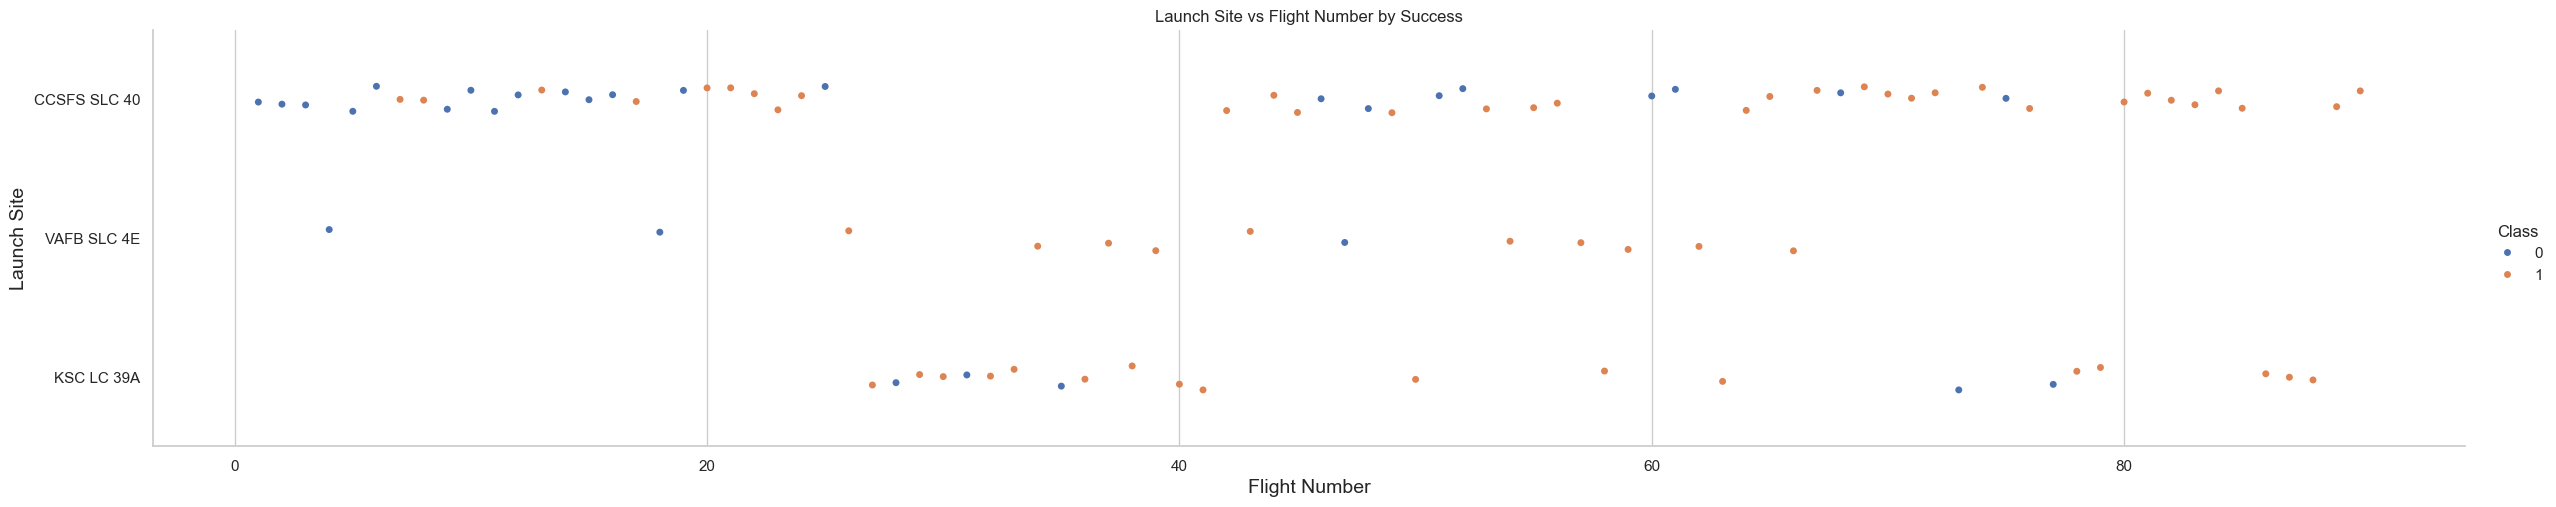

In [7]:
sns.catplot(data=df, x="FlightNumber", y="LaunchSite", hue="Class", aspect=5)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Launch Site vs Flight Number by Success")
plt.show()

## Payload Mass by Launch Site

Next, we analyze how payload mass is distributed across launch sites and its potential effect on success rates.

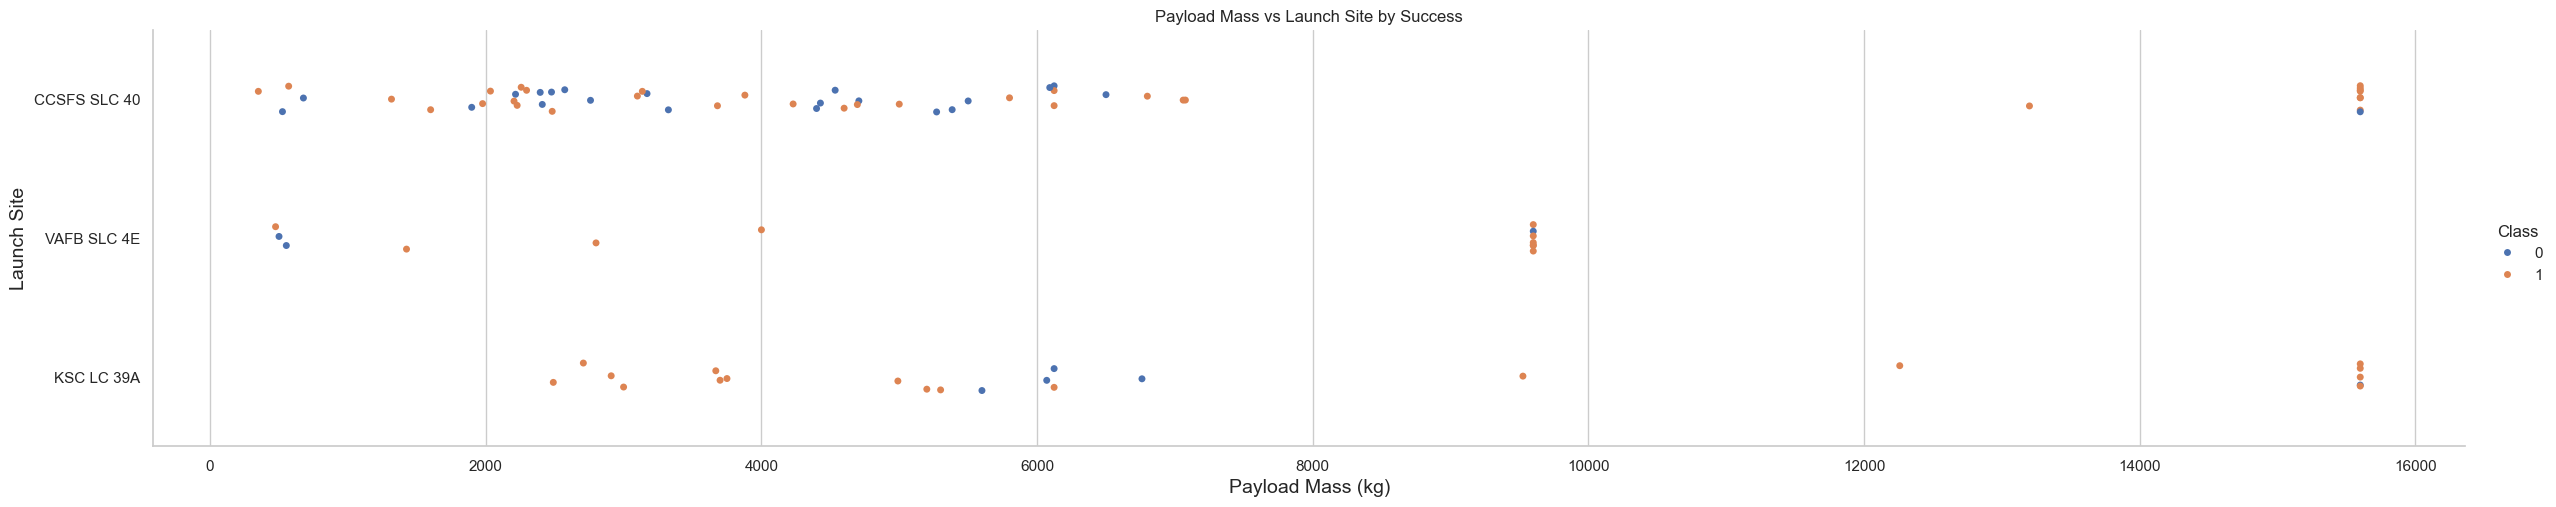

In [8]:
sns.catplot(data=df, x="PayloadMass", y="LaunchSite", hue="Class", aspect=5)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs Launch Site by Success")
plt.show()

## Success Rate by Orbit

We calculate the average success rate grouped by orbit type.

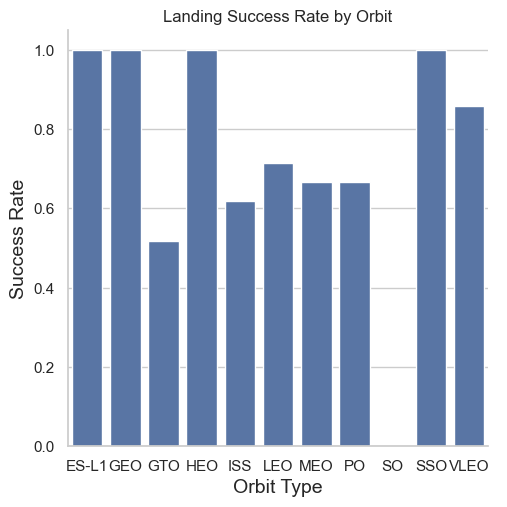

In [9]:
orbit_success = df.groupby("Orbit")["Class"].mean().reset_index()
sns.catplot(data=orbit_success, x="Orbit", y="Class", kind="bar")
plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Landing Success Rate by Orbit")
plt.show()

## Orbit Type by Flight Number

We now look at how different orbits were used across the flight timeline.

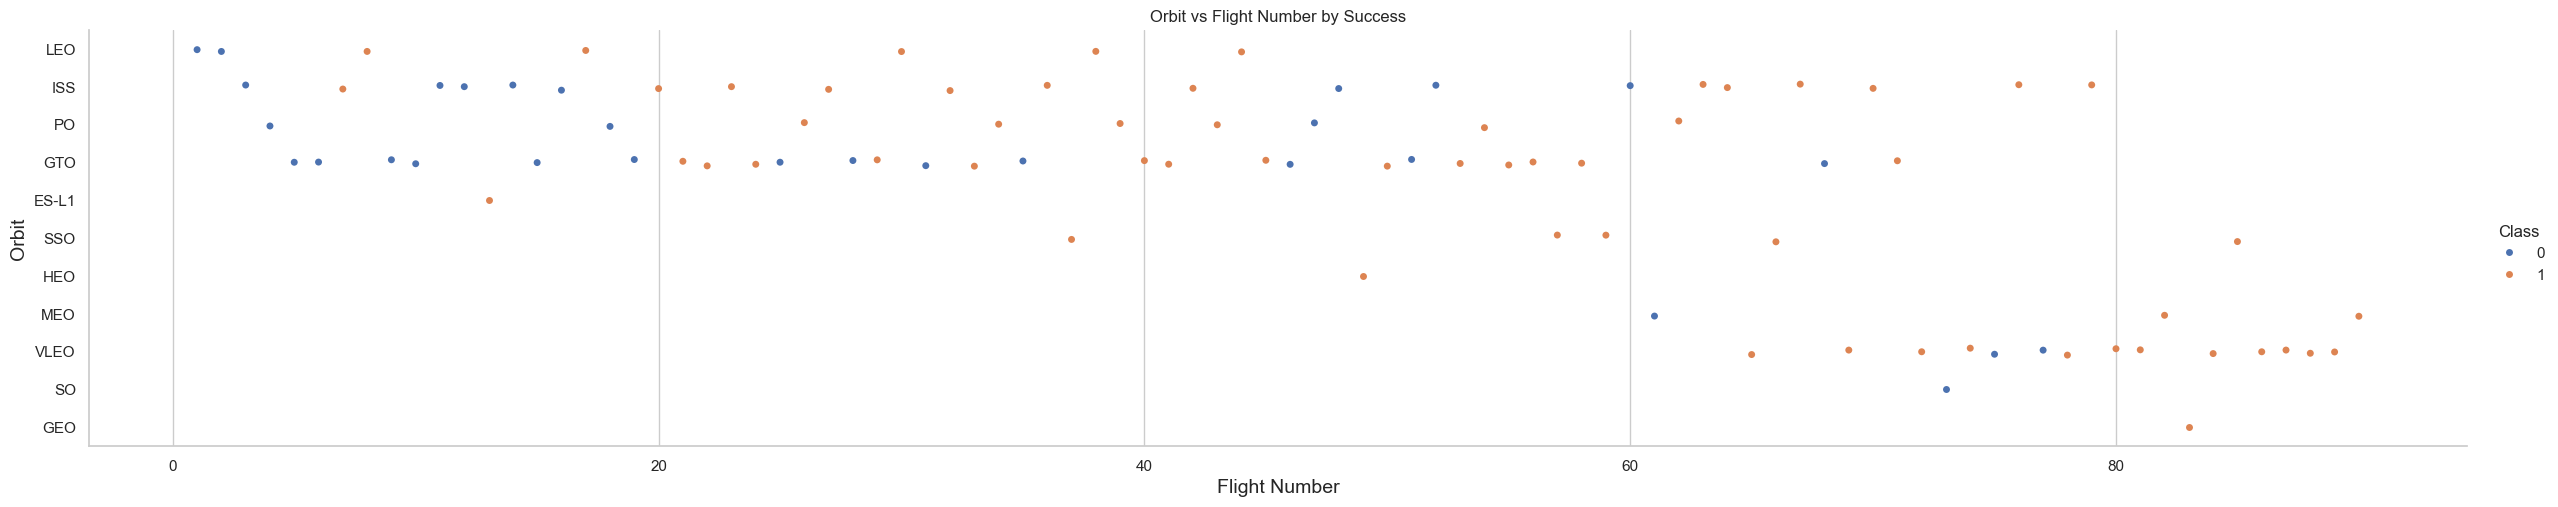

In [10]:
sns.catplot(data=df, x="FlightNumber", y="Orbit", hue="Class", aspect=5)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit", fontsize=14)
plt.title("Orbit vs Flight Number by Success")
plt.show()

## Success Rate Over Time

We extract the launch year from the date column and analyze the trend of successful landings over the years.

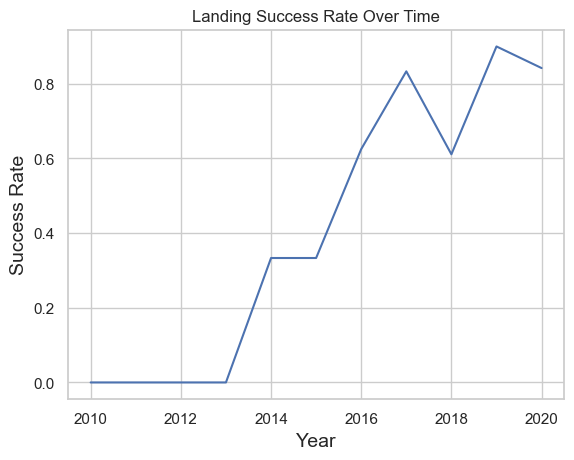

In [11]:
df["Year"] = pd.to_datetime(df["Date"]).dt.year
yearly_success = df.groupby("Year")["Class"].mean()

sns.lineplot(x=yearly_success.index, y=yearly_success.values)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Landing Success Rate Over Time")
plt.show()

# Feature Engineering

In this section, we prepare the dataset for classification modeling by encoding categorical features.

In [12]:
features = df[[
    'FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights',
    'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block',
    'ReusedCount', 'Serial'
]]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


## One-Hot Encoding

We transform the categorical variables into numerical format using one-hot encoding. This allows classification models to interpret the data properly.

In [13]:
features_encoded = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_encoded = features_encoded.astype('float64')
features_encoded.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Save Processed Dataset

We save the final processed dataset for use in the next step of model building.

In [15]:
features_encoded.to_csv("../data/processed/dataset_part_3.csv", index=False)